<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [76]:
import pandas as pd
from src import support_encoding as se

from sklearn.preprocessing import OneHotEncoder

from category_encoders import TargetEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"datos/df_outlier_cleansed.csv", index_col=0)

In [3]:
df.select_dtypes("O").columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'model', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'lastSeen'],
      dtype='object')

Omitiremos el nombre, el modelo y el de codigo postal, ya que presentan el mismo problema: muchas categorías (para futuro podríamos agrupar los codigos postales usando geopy). Al final tenemos categorías que pueden ser independientes para cada coche, lo cual no nos ayuda en la predicción de los precios en nuestro modelo.

In [4]:
df.drop(columns=['name', 'model', 'postalCode'], inplace=True)

In [5]:
df["dateCreated"] = pd.to_datetime(df["dateCreated"]).apply(lambda x: x.strftime("%Y-%m"))
df["dateCrawled"] = pd.to_datetime(df["dateCrawled"]).apply(lambda x: x.strftime("%Y-%m"))
df["lastSeen"] = pd.to_datetime(df["lastSeen"]).apply(lambda x: x.strftime("%Y-%m"))

In [6]:
cat_cols = df.select_dtypes("O").columns

In [7]:
print(cat_cols)

Index(['dateCrawled', 'seller', 'offerType', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'dateCreated', 'lastSeen'],
      dtype='object')


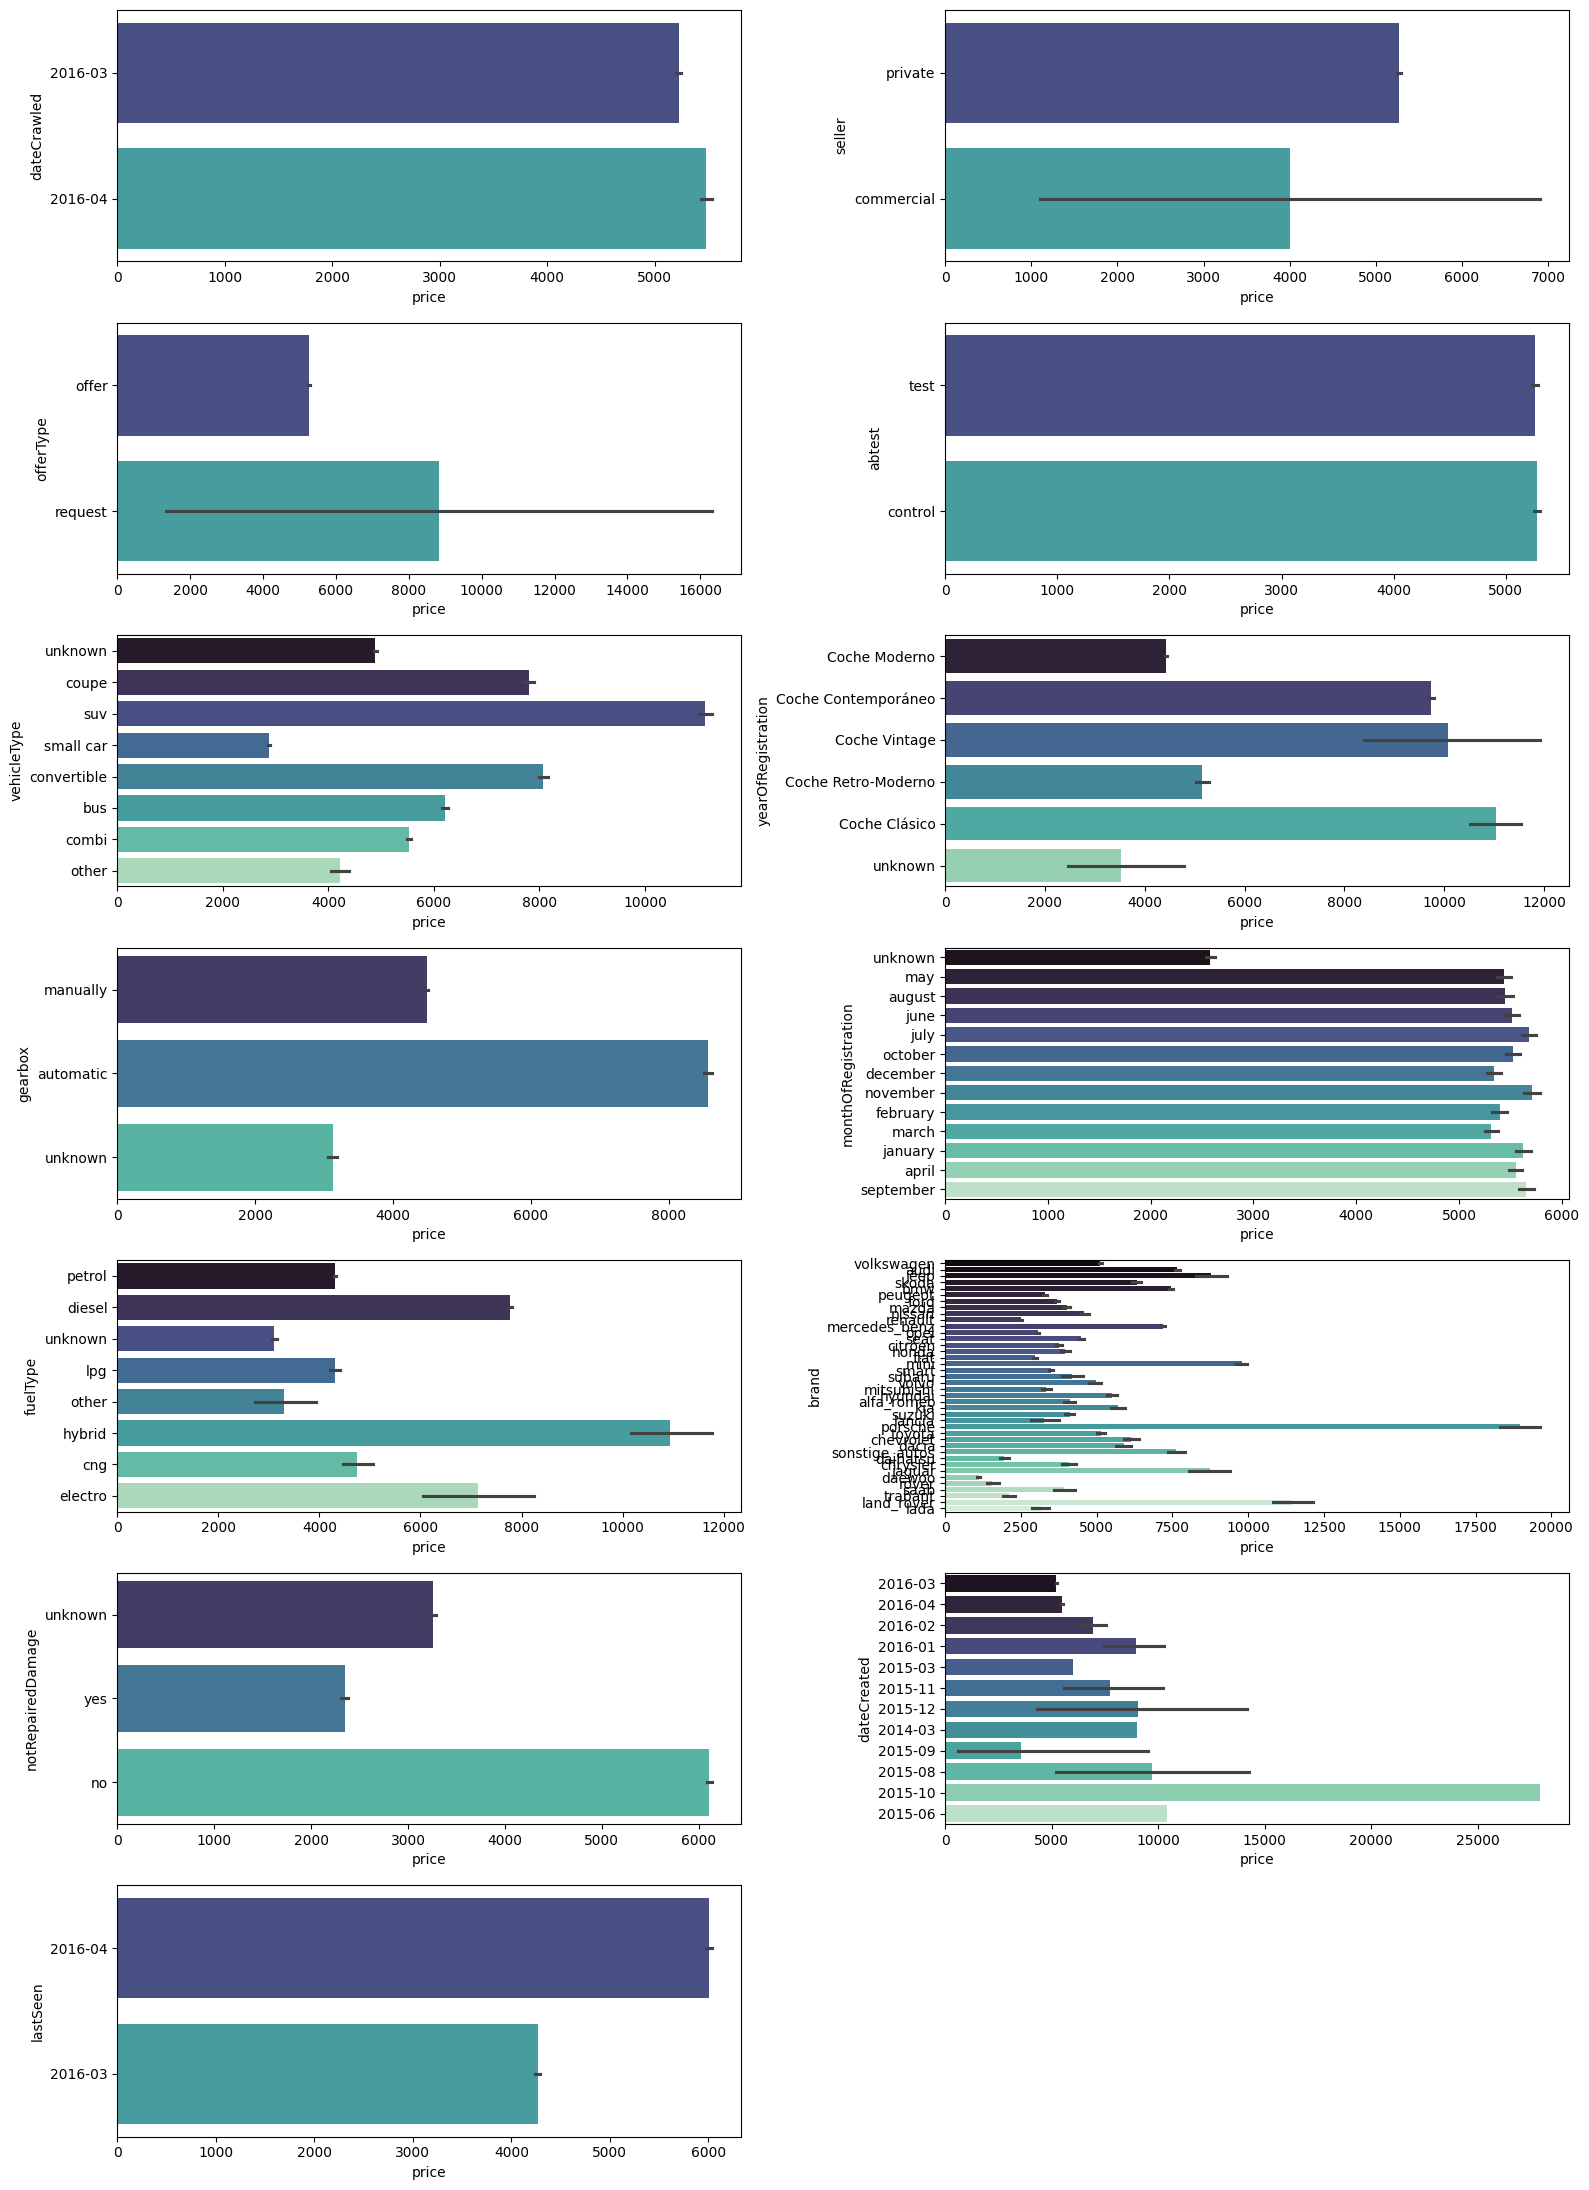

In [8]:
se.plot_cats(data = df, columns=cat_cols, rv = "price" , plot_size=(16,22))

In [9]:
asunciones = se.Asunciones(dataframe=df, columna_numerica="price")


for categoria in cat_cols:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")

Estamos analizando la variable DATECRAWLED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCrawled las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03', '2016-04']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 7685279767.5
Valor p: 7.457118439582961e-26
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,254.5757,0.0,203.5122,305.6391,2016-03-2016-04



###########################

Estamos analizando la variable SELLER
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable seller las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['private', 'commercial']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 361164.5
Valor p: 0.8793848658682002
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable OFFERTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable offerType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['offer', 'request']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 791936.5
Valor p: 0.7905932949466924
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 14411033528.0
Valor p: 0.32352895852009367
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['unknown', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi', 'other']

Realizando test de Kruskal...
Estadístico de prueba: 40041.70760366243
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 

Mostrando los 20 primeros resultados


,meandiff,p-adj,lower,upper,group_diff
0,-684.1168,0.0,-797.7570,-570.4766,bus-combi
1,1862.3879,0.0,1716.6861,2008.0896,bus-convertible
2,1586.3090,0.0,1429.5808,1743.0372,bus-coupe
3,-1996.2008,0.0,-2306.5711,-1685.8304,bus-other
4,-3332.7491,0.0,-3444.2211,-3221.2771,bus-small car
5,4930.7203,0.0,4762.5483,5098.8923,bus-suv
6,-1319.6645,0.0,-1424.6951,-1214.6339,bus-unknown
7,2546.5046,0.0,2418.6032,2674.4061,combi-convertible
8,2270.4258,0.0,2130.0922,2410.7593,combi-coupe
9,-1312.0840,0.0,-1614.5067,-1009.6612,combi-other



###########################

Estamos analizando la variable YEAROFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable yearOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Coche Moderno', 'Coche Contemporáneo', 'Coche Vintage', 'Coche Retro-Moderno', 'Coche Clásico', 'unknown']

Realizando test de Kruskal...
Estadístico de prueba: 20394.470461849363
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-1298.7567,0.0,-1717.2212,-880.2922,Coche Clásico-Coche Contemporáneo
1,-6616.1534,0.0,-7030.2789,-6202.0278,Coche Clásico-Coche Moderno
2,-5885.1103,0.0,-6325.9063,-5444.3143,Coche Clásico-Coche Retro-Moderno
4,-7508.7114,0.0,-9229.9831,-5787.4397,Coche Clásico-unknown
5,-5317.3967,0.0,-5389.7843,-5245.0091,Coche Contemporáneo-Coche Moderno
6,-4586.3536,0.0,-4753.8083,-4418.8989,Coche Contemporáneo-Coche Retro-Moderno
8,-6209.9547,0.0,-7882.2334,-4537.6759,Coche Contemporáneo-unknown
9,731.0431,0.0,574.7467,887.3395,Coche Moderno-Coche Retro-Moderno
10,5651.5293,0.0,4020.1154,7282.9432,Coche Moderno-Coche Vintage
12,4920.4862,0.0,3282.0991,6558.8733,Coche Retro-Moderno-Coche Vintage



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'unknown']

Realizando test de Kruskal...
Estadístico de prueba: 27144.577560499256
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-4081.1205,0.0,-4134.7489,-4027.4921,automatic-manually
1,-5447.6729,0.0,-5560.9165,-5334.4293,automatic-unknown
2,-1366.5524,0.0,-1472.2951,-1260.8096,manually-unknown



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['unknown', 'may', 'august', 'june', 'july', 'october', 'december', 'november', 'february', 'march', 'january', 'april', 'september']

Realizando test de Kruskal...
Estadístico de prueba: 13187.580497609482
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 

Mostrando los 20 primeros resultados


,meandiff,p-adj,lower,upper,group_diff
1,-209.5596,0.0012,-370.9397,-48.1795,april-december
6,-238.0901,0.0000,-385.9211,-90.2592,april-march
11,-2970.3090,0.0000,-3124.2280,-2816.3900,april-unknown
15,230.2375,0.0004,63.2956,397.1793,august-july
19,261.1700,0.0000,89.7818,432.5582,august-november
21,204.3866,0.0057,32.0955,376.6778,august-september
22,-2868.7450,0.0000,-3033.5213,-2703.9686,august-unknown
24,281.4617,0.0000,110.4225,452.5010,december-january
25,338.2330,0.0000,174.3720,502.0941,december-july
26,171.8670,0.0203,13.1028,330.6311,december-june



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'unknown', 'lpg', 'other', 'hybrid', 'cng', 'electro']

Realizando test de Kruskal...
Estadístico de prueba: 42825.68143626629
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3033.4418,0.0000,2335.6466,3731.2370,cng-diesel
1,2407.6076,0.0060,418.2401,4396.9750,cng-electro
2,6205.9649,0.0000,4950.9304,7460.9995,cng-hybrid
6,-1632.2641,0.0000,-2335.4372,-929.0910,cng-unknown
8,3172.5231,0.0000,2126.8912,4218.1551,diesel-hybrid
9,-3458.8453,0.0000,-3691.0126,-3226.6780,diesel-lpg
10,-4468.9029,0.0000,-5852.8738,-3084.9319,diesel-other
11,-3460.5084,0.0000,-3522.6496,-3398.3672,diesel-petrol
12,-4665.7058,0.0000,-4778.3418,-4553.0699,diesel-unknown
13,3798.3573,0.0000,1662.0028,5934.7119,electro-hybrid



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'subaru', 'volvo', 'mitsubishi', 'hyundai', 'alfa_romeo', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'sonstige_autos', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover', 'saab', 'trabant', 'land_rover', 'lada']

Realizando test de Kruskal...
Estadístico de prueba: 45645.26942026953
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 

Mostrando los 20 primeros resultados


,meandiff,p-adj,lower,upper,group_diff
0,3551.1362,0.0000,3097.0538,4005.2187,alfa_romeo-audi
1,3334.7680,0.0000,2883.6555,3785.8805,alfa_romeo-bmw
2,2032.7670,0.0000,1370.6179,2694.9162,alfa_romeo-chevrolet
5,1782.3626,0.0000,965.8527,2598.8724,alfa_romeo-dacia
6,-3003.1470,0.0000,-4025.0414,-1981.2525,alfa_romeo-daewoo
7,-2159.4357,0.0000,-3054.8324,-1264.0391,alfa_romeo-daihatsu
8,-1159.0364,0.0000,-1649.2628,-668.8101,alfa_romeo-fiat
11,1383.2857,0.0000,825.0100,1941.5614,alfa_romeo-hyundai
12,4616.2595,0.0000,3624.8202,5607.6988,alfa_romeo-jaguar
13,4672.5019,0.0000,3787.2860,5557.7178,alfa_romeo-jeep



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['unknown', 'yes', 'no']

Realizando test de Kruskal...
Estadístico de prueba: 37490.46651822199
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-2848.0647,0.0,-2905.8151,-2790.3144,no-unknown
1,-3762.7993,0.0,-3840.2717,-3685.3270,no-yes
2,-914.7346,0.0,-1004.3621,-825.1072,unknown-yes



###########################

Estamos analizando la variable DATECREATED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCreated las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03', '2016-04', '2016-02', '2016-01', '2015-03', '2015-11', '2015-12', '2014-03', '2015-09', '2015-08', '2015-10', '2015-06']

Realizando test de Kruskal...
Estadístico de prueba: 228.94802987129253
Valor p: 7.033145290196586e-43
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
38,24333.3333,0.0096,3134.8077,45531.8590,2015-09-2015-10
45,-20146.1111,0.0326,-39497.6289,-794.5933,2015-10-2015-11
47,-18940.8889,0.0388,-37426.4003,-455.3775,2015-10-2016-01
48,-20948.0075,0.0106,-39329.3458,-2566.6691,2015-10-2016-02
49,-22677.7644,0.0032,-41036.2584,-4319.2704,2015-10-2016-03
50,-22424.8464,0.0038,-40783.4746,-4066.2183,2015-10-2016-04
61,-3736.8755,0.0000,-5900.7148,-1573.0363,2016-01-2016-03
62,-3483.9576,0.0000,-5648.9343,-1318.9808,2016-01-2016-04
63,-1729.7570,0.0000,-2647.1808,-812.3331,2016-02-2016-03
64,-1476.8390,0.0000,-2396.9425,-556.7354,2016-02-2016-04



###########################

Estamos analizando la variable LASTSEEN
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable lastSeen las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-04', '2016-03']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 16795890954.0
Valor p: 0.0
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,1741.1082,0.0,1703.3599,1778.8565,2016-03-2016-04



###########################



Las columnas SELLER, OFFERTYPE, ABTEST no presentan diferencias significativas entre cada una de sus categorías.

In [10]:
display(df["seller"].value_counts(normalize=True))
display(df["offerType"].value_counts(normalize=True))
display(df["abtest"].value_counts(normalize=True))

seller
private       0.999994
commercial    0.000006
Name: proportion, dtype: float64

offerType
offer      0.999985
request    0.000015
Name: proportion, dtype: float64

abtest
test       0.518111
control    0.481889
Name: proportion, dtype: float64

Vemos que en SELLER y OFFERTYPE hay una distribución clara en las categorías: vendedores privados y ofertas son lo mayoritariamente predominante. De esta forma, podemos optar por omitir estas dos columnas categóricas, ya que no podremos predecir bien los precios de aquellas excepciones que son de vendedor comercial o tipo de oferta petición.

Para la columna abtest simplemente haremos un one-hot encoder.

In [11]:
onehot = OneHotEncoder()
trans_one_hot = onehot.fit_transform(df[["abtest"]])
oh_df = pd.DataFrame(trans_one_hot.toarray(), columns=onehot.get_feature_names_out())

In [12]:
df = pd.concat([df.reset_index(drop=True), oh_df.reset_index(drop=True)], axis=1)

In [13]:
df.drop(columns=["seller", "offerType", "abtest"], inplace=True)

df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,abtest_control,abtest_test
0,2016-03,480.0,unknown,Coche Moderno,manually,-0.382606,0.0,unknown,petrol,volkswagen,unknown,2016-03,2016-04,0.0,1.0
1,2016-03,18300.0,coupe,Coche Contemporáneo,manually,1.218855,-0.5,may,diesel,audi,yes,2016-03,2016-04,0.0,1.0
2,2016-03,9800.0,suv,Coche Moderno,automatic,0.790609,-0.5,august,diesel,jeep,unknown,2016-03,2016-04,0.0,1.0
3,2016-03,1500.0,small car,Coche Moderno,manually,-0.642369,0.0,june,petrol,volkswagen,no,2016-03,2016-03,0.0,1.0
4,2016-03,3600.0,small car,Coche Moderno,manually,-0.741195,-1.2,july,diesel,skoda,no,2016-03,2016-04,0.0,1.0


In [14]:
df.reset_index(drop=True, inplace=True)

Ahora tratemos con las otras categóricas que sí presentan diferencias significativas entre las categorías. A estas las encodearemos usando el target, ya que mantiene un contexto general de los datos, usando de referencia nuestra variable respuesta.

In [15]:
df.select_dtypes("O").columns

Index(['dateCrawled', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'lastSeen'],
      dtype='object')

In [84]:
encoder = TargetEncoder(cols = df.select_dtypes("O").columns)
df_encoded = encoder.fit_transform(X = df, y = df["price"])

In [85]:
df_encoded.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,abtest_control,abtest_test
0,5224.771092,480.0,4891.401940,4419.953028,4489.537537,-0.382606,0.0,2581.485607,4310.720546,5121.140345,3261.357242,5222.235563,6006.756621,0.0,1.0
1,5224.771092,18300.0,7797.375426,9737.349721,4489.537537,1.218855,-0.5,5438.022583,7771.228940,7663.477096,2346.622617,5222.235563,6006.756621,0.0,1.0
2,5224.771092,9800.0,11141.786746,4419.953028,8570.658072,0.790609,-0.5,5450.230558,7771.228940,8784.842776,3261.357242,5222.235563,6006.756621,0.0,1.0
3,5224.771092,1500.0,2878.317321,4419.953028,4489.537537,-0.642369,0.0,5514.101940,4310.720546,5121.140345,6109.421964,5222.235563,4265.648396,0.0,1.0
4,5224.771092,3600.0,2878.317321,4419.953028,4489.537537,-0.741195,-1.2,5680.468025,7771.228940,6320.056395,6109.421964,5222.235563,6006.756621,0.0,1.0


In [86]:
df_encoded.to_csv("datos/encoded.csv")